 <div style="overflow: hidden;">
    <div style="float: right; margin-left: 20px;">
        <img src="https://i.pinimg.com/originals/88/48/21/884821fcc2d940ae35532687d3561c9f.jpg" alt="Fake or real news classification" width="400"/>
    </div>

<div style="margin-top: 40px; font-family: 'Arial', sans-serif;">
    
 <span style="color:#c44b7e; font-size: 24px; font-family: 'Courier New', sans-serif; font-weight: 600;">Fake or real news classification 📰</span>

 <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 500;">Done by : Lujain Yousef</span>

 <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Columns:</span>

- <span style="color:#E63870; font-family: 'Courier New', sans-serif; font-weight: bold;"> title:</span><br>
         <span style="color:#8C6A5D; font-family: 'Courier New', sans-serif; font-weight: 600;">This column contains the titles of news articles or headlines. It represents the main headline or title of the news story.</span><br>

- <span style="color:#E63870; font-family: 'Courier New', sans-serif; font-weight: bold;">text:</span><br>
       <span style="color:#8C6A5D; font-family: 'Courier New', sans-serif; font-weight: 600;">This column contains the main body of the news article. It includes the full text of the news story, providing more context and details beyond the headline.</span><br>
    
- <span style="color:#E63870; font-family: 'Courier New', sans-serif; font-weight: bold;">label:</span><br>
       <span style="color:#8C6A5D; font-family: 'Courier New', sans-serif; font-weight: 600;">This column indicates whether the news article is classified as "FAKE" or "REAL". It's likely a binary classification where "FAKE" denotes articles that are considered false or misleading, while "REAL" denotes articles that are considered genuine or accurate.</span><br>

 <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Text Vectorization and Classification:</span>
- <span style="color:#8C6A5D; font-family: 'Courier New', sans-serif; font-weight: 600;">I performed text vectorization using both CountVectorizer and TF-IDF to convert the text data into numerical features suitable for machine learning models. After that, I applied Multinomial Naive Bayes classifier to classify the news articles into "FAKE" or "REAL" categories. </span><br>

</div>
</div>

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Data</span>

In [1]:
import pandas as pd 
df = pd.read_csv('fake_or_real_news.csv',index_col='Unnamed: 0')
df

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Splitting the Data</span>

In [3]:
X = df['text']
y = df.label

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=53)

In [5]:
y.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

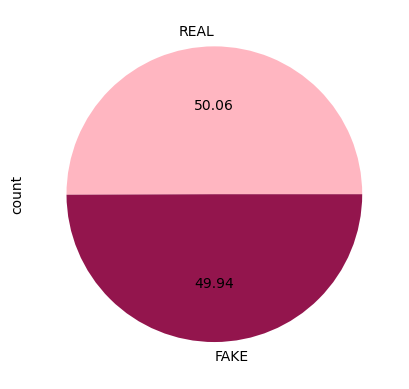

In [6]:
import matplotlib.pyplot as plt

# Assuming y is your pandas Series or DataFrame column
y.value_counts().plot.pie(autopct='%.2f', colors=['#ffb6c1', "#93154d"])
plt.show()


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Count Vectorizer</span>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words="english")

In [8]:
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)

In [9]:
# feature names 
count_vec.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000031', '000035', '00006', '0001',
       '0001pt', '000ft', '000km'], dtype=object)

In [10]:
# vectors 
count_train.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
import pandas as pd
# Create DataFrame from CountVectorizer transformed data
count_df = pd.DataFrame(count_train.A, columns=count_vec.get_feature_names_out())
count_df

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
count_df.columns

Index(['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt',
       '000ft', '000km',
       ...
       'حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى',
       'ยงade'],
      dtype='object', length=56922)

### <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Tfidf Vectorizer</span>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words='english',max_df=0.7)

In [14]:
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)

In [15]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5]) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
tfidf_df = pd.DataFrame(tfidf_train.A,columns=tfidf_vec.get_feature_names_out())
tfidf_df

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0.0,0.014123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4240,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">check count_df and tfidf_df if </span>

In [17]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


set()
False


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Naive Bayes Model on count_df</span>

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train,y_train)

pred = nb_classifier.predict(count_test)

acc = accuracy_score(y_test,pred) 
acc

0.893352462936394

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred,labels=['FAKE','REAL'])

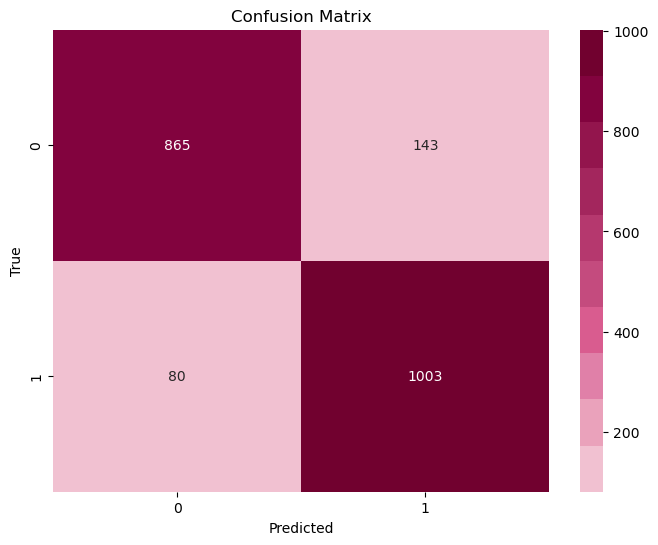

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#f1c1d1", "#eaa2bb", "#e080a8", "#d95c8f", "#c44b7e", "#b5386e", "#a3265d", "#93154d", "#82033e", "#71012f"]

# Plot the confusion matrix using a heatmap with the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=colors, fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Naive Bayes Model on tfidf_df</span>

In [21]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
score


0.8565279770444764

In [22]:
# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

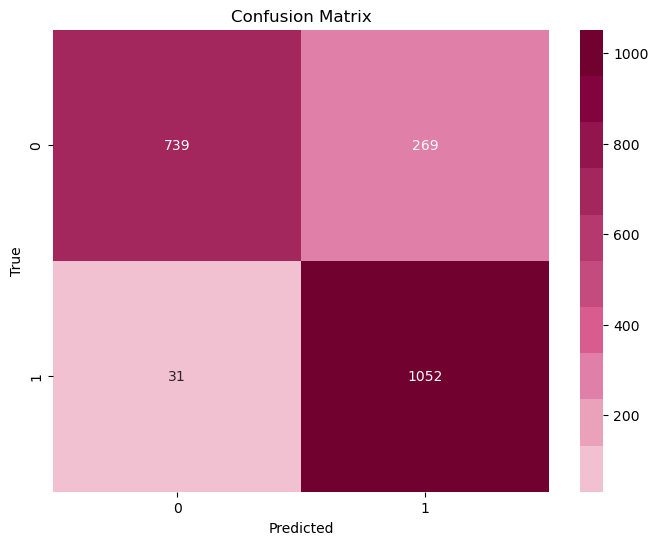

In [23]:
# Plot the confusion matrix using a heatmap with the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=colors, fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
y.unique()

array(['FAKE', 'REAL'], dtype=object)

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Tune alpha hyperparameter</span>

In [25]:
import numpy as np
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.6150167384026781

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4


C:\Users\yluja\Documents\adult.csv\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Best Tuned model</span>

In [26]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB( alpha = 0.2)
# Fit to the training data
nb_classifier.fit(tfidf_train, y_train)
# Predict the labels: pred
pred = nb_classifier.predict(tfidf_test)
# Compute accuracy: score
score = accuracy_score(y_test, pred)
score

0.8938307030129125

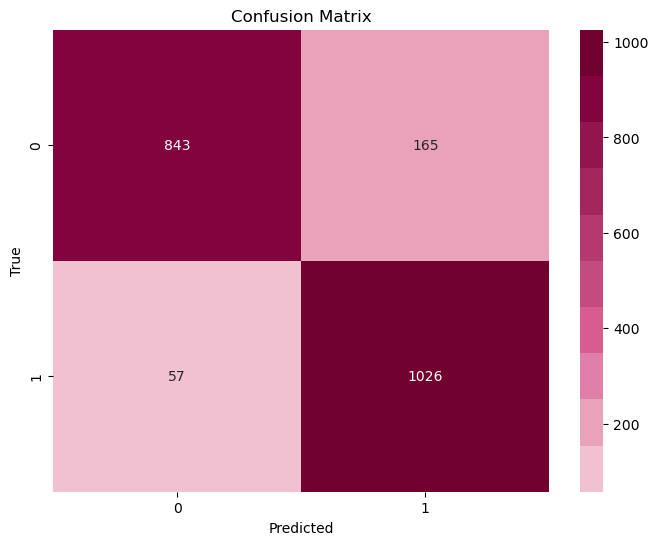

In [27]:
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
# Plot the confusion matrix using a heatmap with the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=colors, fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">The End</span>